#Quiz
>다음 사이트에서 데이터 다운로드

- https://www.kaggle.com/c/bike-sharing-demand/data

#1. 파일 읽기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

train_file = '/content/drive/MyDrive/11. 선형회귀/data/train.csv'
test_file = '/content/drive/MyDrive/11. 선형회귀/data/test.csv'

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

print(df_train.shape)
print(df_train.head(3))
df_train.tail(3)

(10886, 12)
              datetime  season  holiday  ...  casual  registered  count
0  2011-01-01 00:00:00       1        0  ...       3          13     16
1  2011-01-01 01:00:00       1        0  ...       8          32     40
2  2011-01-01 02:00:00       1        0  ...       5          27     32

[3 rows x 12 columns]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


>* session : 1=봄, 2=여름, 3=가을, 4=겨울
* holiday : 1=토일을 제외한 휴일, 0=휴일이 아닌 날
* workingday : 1 = 평일, 0 = 주말 및 휴일
* weather : 1=맑음, 약간 구름 낀 흐림, 2=안개, 안개+흐림, 3=가벼운 눈, 가벼운 비+천둥, 4=심한 눈/비, 천둥/번개
* temp : 온도(섭씨)
* atemp : 체감온도(섭씨)
* humidity : 습도
* windspeed : 풍속
* casual : 사전에 등록되지 않은 사용자가 대여한 회수
* registered : 사전에 등록한 사용자가 대여한 횟수
* count : 대여횟수

> head와 tail로 확인 결과 datetime의 정보는 년, 월, 일 , 시까지만 변경되면 분, 초는 0으로 표시되는 것을 알 수 있다.

#2. 데이터 변환
> datetime을 이용하여 년, 월, 일, 시간으로 분리할 것이다.

##2.1 데이터 확인

In [ ]:
df_train['datetime'].head(2)

> 현재 datetime의 형식이 object 형으로 되어 있어 날짜 분리가 쉽지 않다.

In [ ]:
df_train['datetime'] = df_train['datetime'].apply(pd.to_datetime)
df_train['datetime'].head(2)

> pandas에 있는 to_datetime함수를 이용하여 object 형을 datetime 형식으로 변경하였다.

In [ ]:
print(df_train['datetime'][0])
print(df_train['datetime'][0].year)
print(df_train['datetime'][0].month)
print(df_train['datetime'][0].day)
print(df_train['datetime'][0].hour)

> 현재 datetime의 자료형이 datetime64이기 때문에 year, month, day, hour 키워드로 각 데이터를 추출할 수 있다.

##2.2 데이터 변환

In [ ]:
df_train['datetime'].apply(lambda x : x.year)

> x는 df_train['datetime']의 각 값들을 하나씩 읽어 들이므로 그 값 중 year 정보만 추출한 것이다.

> year, month, day, hour를 별도의 feature로 만들어 데이터를 저장하시오

In [ ]:
df_train['year'] = df_train['datetime'].apply(lambda x : x.year)
df_train['month'] = df_train['datetime'].apply(lambda x : x.month)
df_train['day'] = df_train['datetime'].apply(lambda x : x.day)
df_train['hour'] = df_train['datetime'].apply(lambda x : x.hour)
df_train.head(2)

##2.3 불필요한 데이터 제거
> 자전거 대여 횟수를 예측함에 있어 casual(사전에 등록되지 않은 사용자가 대여한 회수), registered(사전에 등록한 사용자가 대여한 횟수) feature는 큰 영향을 미치지 않을 것이므로 제거할 것이다. 또한 날짜 정보는 년, 월, 일, 시간으로 분리했음으로 더 이상 필요 없게 된다.

In [ ]:
drop_list = ['casual', 'registered', 'datetime']
df_train.drop(columns=drop_list, axis=1, inplace=True)

#3. 성능 평가 지표
> 이번 챕터에서는 예측 성능 측정을 위해 RMSLE(Root Mean Square Log Error)에 대해 알아 볼 것이다.

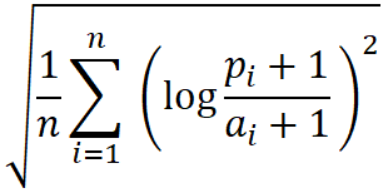

> RMSLE는 위와 같은 식으로 나타난다. pi는 예측값을 ai는 실제값을 의미한다. sklearn에서는 RMSLE를 지원하지 않기 때문에 별도로 함수를 만들 것이다. 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def get_rmsle(y, pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  mlse = np.sum( (log_y - log_pred)**2)
  # rmsle = np.sqrt(mlse)
  rmsle = np.sqrt( np.mean(mlse) )
  return rmsle

def get_rmse(y, pred):
  return np.sqrt(mean_squared_error(y, pred))

def eval_reg(y, pred):
  rmsle = get_rmsle(y, pred)
  rmse = get_rmse(y, pred)
  mae = mean_absolute_error(y, pred)

  print('RMSLE : ', rmsle)
  print('RMSE : ', rmse)
  print('MAE : ', mae)

> MAE는 예측값과 실제값의 편차에 대한 절대값의 평균을 의미한다.

#4. 모델 만들기

##4.1 데이터 분류

In [ ]:
from sklearn.model_selection import train_test_split

df_labels = df_train['count']
df_data = df_train.drop(columns=['count'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, random_state=62)

> 원본 데이터에서 이미 train, test를 분리해 두었기 때문에 위의 내용으로 처리하면 안되지만 학습 차원에서 반복적인 내용을 처리하지 않기 위해 train 정보를 원본 데이터라고 생각하고 학습데이터와 검증데이터로 분류해 사용할 것이다.

##4.2 모델 만들기

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

eval_reg(y_test, pred)

RMSLE :  66.57220364352084
RMSE :  143.56472659040594
MAE :  107.04602134107608


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


> 실행 결과 실제 값과 예측 값의 차이가 많게 나타난다.

##4.3 데이터 확인

In [ ]:
df_sub = pd.DataFrame(data = y_test.values, columns=['real'])
df_sub.head(2)

> 실제 값을 dataframe으로 만든다.

In [ ]:
df_sub['pred'] = pred
df_sub['diff'] = df_sub['real'] - df_sub['pred']
df_sub.head()

> 만든 dataframe에 예측값과 차이값을 추가로 넣는다. 차이값을 보면 음수가 나타나게 되어 절대값으로 변환할 것이다.

In [ ]:
df_sub['diff'] = np.abs(df_sub['real'] - df_sub['pred'])
df_sub.sort_values('diff')

,real,pred,diff
90,1,1.045839,0.045839
2935,129,129.119477,0.119477
519,9,9.155573,0.155573
446,59,58.837297,0.162703
3049,239,238.786961,0.213039
...,...,...,...
351,970,409.112894,560.887106
542,917,341.899125,575.100875
427,948,366.327974,581.672026
1362,977,391.085473,585.914527


> 절대값으로 변환하 정렬한 결과를 확인하면 실제값과 예측값의 차이가 크게 나타나는 것을 볼 수 있다.

#5. log 적용

In [ ]:
df_labels.hist()

> 예측을 위한 데이터는 분포는 정규 분포가 되었을 때 더 좋은 성능을 갖게 된다. 위의 데이터를 보면 한쪽으로 쏠려있는 모양으로 나타나 성능이 떨어지게 된다. 따라서 정규 분포로 만들기 위해 log함수를 이용할 것이다. 일반 데이터를 log로 변환하게 되면 데이터의 분포가 정규 분포 형식을 갖게 된다.

In [ ]:
df_log_labels = np.log1p(df_labels)
df_log_labels.hist()

> 실행 결과 완벽한 정규 분포는 아니지만 비슷한 모양으로 나타나긴 했다. 이를 이용하여 다시한번 예측값을 출력해 보자.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, df_log_labels, test_size=0.3, random_state=62)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# log로 데이터 크기를 줄였음으로 지수함수를 이용하여 원래 크기로 변경
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(pred)

eval_reg(y_test_exp, y_pred_exp)

RMSLE :  57.87568461974528
RMSE :  161.46859236688547
MAE :  107.66924421282333


#6. 원핫 인코딩

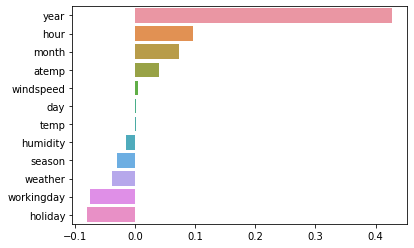

In [ ]:
import seaborn as sns

coeff = pd.Series(data=lr.coef_, index=df_data.columns)
coeff_sort = coeff.sort_values(ascending = False)
sns.barplot(x=coeff_sort.values, y=coeff_sort.index)

> 회귀 계수가 가장 큰 값인 year가 자전거 대여에 큰 영향을 미치는 것으로 나타났다. 이는 2011, 2012의 큰 수치로 인식되어 문제가 발생된 것이다. 수치가 아닌 범주로 표현되어야 하기 때문에 원-핫 인코딩으로 문제를 해결할 것이다.

In [ ]:
col_list = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour']
df_data_ohe = pd.get_dummies(df_data, columns=col_list)
df_data_ohe.head(2)

> 전체 feature에서 수치 데이터를 제외한 나머지 정보 모두 원-핫 인코딩으로 변경해야 하기 때문에 'season', 'holiday', 'workingday', 'weather' 4가지가 추가 되었다.





In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data_ohe, df_log_labels, test_size=0.3, random_state=62)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# log로 데이터 크기를 줄였음으로 지수함수를 이용하여 원래 크기로 변경
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(pred)

eval_reg(y_test_exp, y_pred_exp)

RMSLE :  33.06786777788388
RMSE :  97.99514264397186
MAE :  63.93917807249035


#7. 하이퍼 파라미터

##7.1 성능 평가 함수

In [ ]:
from sklearn.model_selection import GridSearchCV

def get_best_param(model, alpha_list):
  params={
      'alpha':alpha_list
  }

  grid_cv = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
  grid_cv.fit(df_data_ohe, df_log_labels)

  print('best score : ', grid_cv.best_score_)
  print('best param : ', grid_cv.best_params_)

> 예측 모델에서 큰 값일수록 좋은 성능을 표현한다. 하지만 선형회귀에서 실제값과 예측값의 편차가 크면 안 좋은 성능으로 나타나기 때문에 큰 수를 작은 수로 인식 시키기 위해 음수로 표현하였다. 음수 표현을 위해 neg_mean_squared_error 평가 지표를 사용하였다.

##7.2 Ridge

In [ ]:
from sklearn.linear_model import Ridge

model=Ridge()
alpha_list=[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]

get_best_param(model, alpha_list)

> 최적의 파라미터가 10이 나왔다. 범위는 1~25 사이에 있는 10이 나왔음으로 그 사이의 숫자를 다시 한번 확인해 볼 것이다.

In [ ]:
# 2, 7, 12, 17, 22, 27
alpha_list=range(2, 27, 5)

get_best_param(model, alpha_list)

> 위의 범위를 1보다 크고 25보다 작은 수를 지정해야 한다. 따라서 시작값은 2이고 끝값은 24인 값을 지정하면 된다. 24 - 2 는 22이고 이 수는 2와 11을 곱한 값이 된다. 2로 시작해서 24로 끝나는 수의 간격은 2 또는 11일 수 밖에 없으면 2는 너무 작고 11은 너무 큼으로 대략 27을 잡아서 5씩 간격을 만들었다. 

> 최적의 파라미터가 7이 나왔다. 범위는 2 ~ 12 사이에 수가 나왔음으로 3 ~ 11 사이에 값을 확인해 보자

In [ ]:
alpha_list=range(3, 11, 1)

get_best_param(model, alpha_list)

> 최종적으로 6이 최적의 파라미터가 되었다.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data_ohe, df_log_labels, test_size=0.3, random_state=62)

ridge = Ridge(alpha=6)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

# log로 데이터 크기를 줄였음으로 지수함수를 이용하여 원래 크기로 변경
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(pred)

eval_reg(y_test_exp, y_pred_exp)

RMSLE :  33.08119988850807
RMSE :  98.51051652334415
MAE :  64.18434029145128


> Ridge의 하이퍼 파라미터는 6이었음으로 alpha를 6으로 지정한 후 성능 평가를 진행하면 된다. 진행 결과 큰 차이를 보이지는 않는다.

##7.3 Lasso

In [ ]:
from sklearn.linear_model import Lasso

model=Lasso()
alpha_list=[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]

get_best_param(model, alpha_list)

In [ ]:
alpha_list=[0.0005, 0.0006, 0.0007, 0.0008, 0.0009,0.001, 0.0011, 0.0012, 0.0013, 0.0014 ]

get_best_param(model, alpha_list)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data_ohe, df_log_labels, test_size=0.3, random_state=62)

lasso = Lasso(alpha=0.0012)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)

# log로 데이터 크기를 줄였음으로 지수함수를 이용하여 원래 크기로 변경
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(pred)

eval_reg(y_test_exp, y_pred_exp)

RMSLE :  33.09502511250567
RMSE :  98.94061160220313
MAE :  63.98452554484278


##7.4 Elastic net

In [ ]:
from sklearn.model_selection import GridSearchCV

def get_best_param():
  params={
      'alpha':alpha_list,
      'l1_ratio':l1_list
  }

  grid_cv = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
  grid_cv.fit(df_data_ohe, df_log_labels)

  print('best score : ', grid_cv.best_score_)
  print('best param : ', grid_cv.best_params_)

In [ ]:
from sklearn.linear_model import ElasticNet

model=ElasticNet()
alpha_list=[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]
l1_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
get_best_param()

best score :  -0.3793875730951889
best param :  {'alpha': 0.001, 'l1_ratio': 1}


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data_ohe, df_log_labels, test_size=0.3, random_state=62)

en = ElasticNet(alpha=0.001, l1_ratio=1)
en.fit(X_train, y_train)
pred = en.predict(X_test)

# log로 데이터 크기를 줄였음으로 지수함수를 이용하여 원래 크기로 변경
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(pred)

eval_reg(y_test_exp, y_pred_exp)

RMSLE :  33.07840786736458
RMSE :  98.73192420551251
MAE :  63.9397794348024
